<a href="https://colab.research.google.com/github/ankitkrtiwari7/ankitkrtiwari7/blob/main/yesbank_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# loading data
df = pd.read_csv('/content/drive/MyDrive/yes_bank_analysis/data_YesBank_StockPrices.csv')

In [4]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [5]:
#checking wheater data have nun value or not
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [6]:
df[0:1]

,Date,Open,High,Low,Close
0,Jul-05,13.0,14.0,11.25,12.46


In [7]:
df.shape

(185, 5)

In [8]:
#Checking the information about the types variables in the dataset about and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


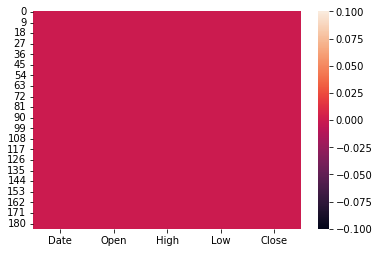

In [9]:
# to check null values by visualization method
sns.heatmap(df.isnull(),cbar=True) 

In [11]:
#Description of the data 
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [12]:
data3 = df.drop(['Date'],axis=1)

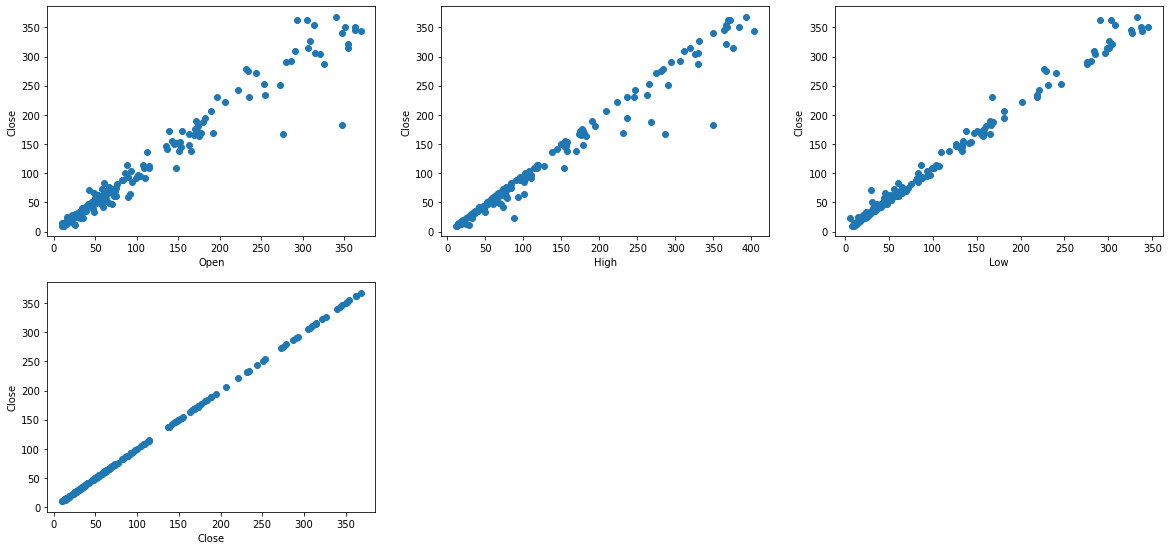

In [13]:
#Plotting the scatter plot
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in data3:
  ax = plt.subplot(12, 3, plotnumber)
  plt.scatter(data3[feature], data3['Close'])
  plt.xlabel(feature)
  plt.ylabel('Close')
  plotnumber+=1

plt.show()

In [15]:
df['Date'][0:5]

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
Name: Date, dtype: object

In [17]:
from datetime import datetime
#Since the datatype of column 'Date' is object, we are converting it to datetime type.
from datetime import datetime
from datetime import date

df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [18]:
#Checking once again first few rows of our dataset to ensure whether the date datatype is changed or not.
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [20]:
#Setting the column Date as the index
df.set_index('Date',inplace=True)